# import liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Read Data

In [2]:
data=pd.read_csv("Loan_default.csv")

In [3]:
# create copy of data
df=data.copy()

In [4]:
# disaplay first five rows of data
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


# EDA

In [5]:
# checking shape of data
df.shape

(255347, 18)

In [6]:
# finding na value from data
df.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [7]:
# find duplicate values from data
df.duplicated().sum()

0

<Axes: >

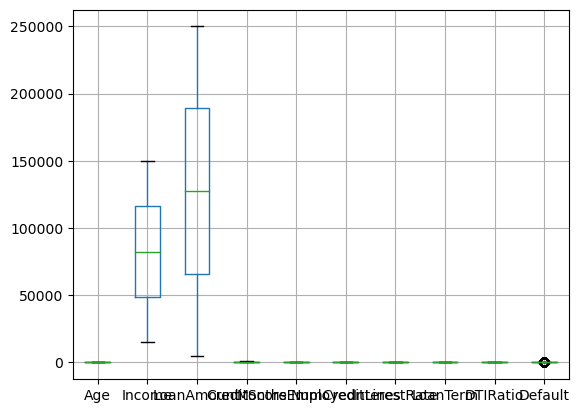

In [8]:
# find outliers from data by using boxplot
df.boxplot()

In [9]:
# drop unwanted column from data
df.drop(["LoanID","MonthsEmployed","Education","EmploymentType","MaritalStatus","HasDependents","HasCoSigner"],axis=1,inplace=True)

In [10]:
df.head()

,Age,Income,LoanAmount,CreditScore,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,LoanPurpose,Default
0,56,85994,50587,520,4,15.23,36,0.44,Yes,Other,0
1,69,50432,124440,458,1,4.81,60,0.68,No,Other,0
2,46,84208,129188,451,3,21.17,24,0.31,Yes,Auto,1
3,32,31713,44799,743,3,7.07,24,0.23,No,Business,0
4,60,20437,9139,633,4,6.51,48,0.73,No,Auto,0


In [11]:
# finding incorrect values by using unique function
df["Age"].unique()

array([56, 69, 46, 32, 60, 25, 38, 36, 40, 28, 41, 53, 57, 20, 39, 19, 61,
       47, 55, 50, 29, 42, 66, 44, 59, 45, 33, 64, 68, 54, 24, 26, 35, 21,
       31, 67, 43, 37, 52, 34, 23, 51, 27, 48, 65, 62, 58, 18, 22, 30, 49,
       63], dtype=int64)

In [12]:
df["LoanTerm"].unique()

array([36, 60, 24, 48, 12], dtype=int64)

In [13]:
df["NumCreditLines"].unique()

array([4, 1, 3, 2], dtype=int64)

In [14]:
df["LoanPurpose"].unique()

array(['Other', 'Auto', 'Business', 'Home', 'Education'], dtype=object)

In [15]:
# describe data columns
df.describe()

,Age,Income,LoanAmount,CreditScore,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   NumCreditLines  255347 non-null  int64  
 5   InterestRate    255347 non-null  float64
 6   LoanTerm        255347 non-null  int64  
 7   DTIRatio        255347 non-null  float64
 8   HasMortgage     255347 non-null  object 
 9   LoanPurpose     255347 non-null  object 
 10  Default         255347 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 21.4+ MB


# Data Visualization

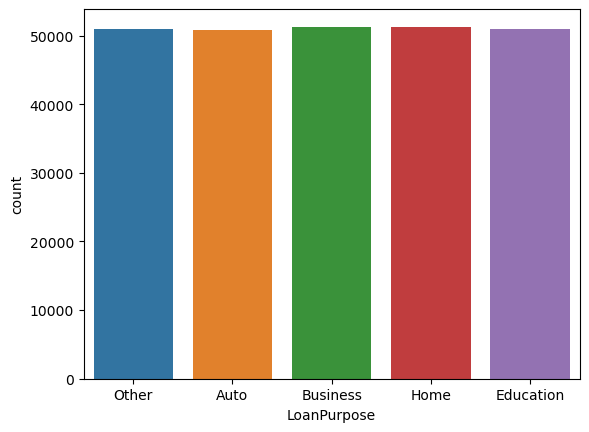

In [17]:
# understand categorical columns
# use barchart to display the frequency or count of each category in each coulmn
sns.countplot(x="LoanPurpose",data=df)
plt.show()

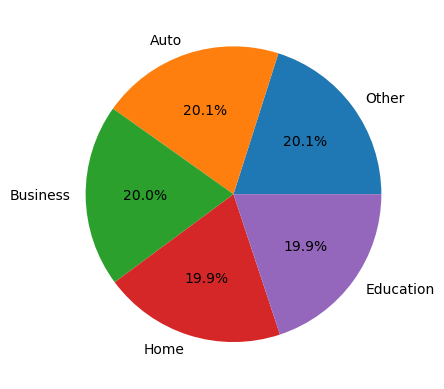

In [18]:
# represent different categories in pie chart
plt.pie(df["LoanPurpose"].value_counts(),labels=df["LoanPurpose"].unique(),autopct="%1.1f%%")
plt.show()

# Data Preprocessing

In [19]:
#import Label Encoder.it convert categorical data which consists of categories into numerical value. 

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
label_encoder=LabelEncoder()

In [22]:
df["HasMortgage"]=label_encoder.fit_transform(df["HasMortgage"])
df["LoanPurpose"]=label_encoder.fit_transform(df["LoanPurpose"])

In [23]:
#to check output column values by using value counts

In [24]:
df["Default"].value_counts()

0    225694
1     29653
Name: Default, dtype: int64

In [25]:
# assign the values to x and y
x = df.drop("Default", axis = 1)
y = df["Default"]

In [26]:
# split the data into train,test,split
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=80)

In [28]:
#import imblearn library  for handle the imbalanced dataset. imbalanced dataset occur when the distribution of
#classes is not equal

In [29]:
# SMOTE is focuses on oversampling the minority class by generating synthetic samples
#1.Identify Minoriy Class
#2.Creating Synthetic Samples
#3.Balancing the Dataset

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

# Model Fitting

In [32]:
#import logisticRegression Algorithm

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model=LogisticRegression()

In [35]:
model.fit(x_train,y_train)

LogisticRegression()

In [36]:
#testing prediction of test data
test_pred=model.predict(x_test)

In [37]:
#training prediction of train data 
train_pred=model.predict(x_train)

In [38]:
#import classification matrix
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [39]:
#test accuracy of the Logistic Regression
test_accuracy=accuracy_score(y_test,test_pred)
test_accuracy

0.6598002741335421

In [40]:
#train accuracy of Logistic Regression
train_accuracy=accuracy_score(y_train,train_pred)
train_accuracy

0.6577284008065767

In [41]:
#classification report of the Logistic Regression
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.93      0.66      0.78     45178
           1       0.20      0.63      0.30      5892

    accuracy                           0.66     51070
   macro avg       0.57      0.65      0.54     51070
weighted avg       0.85      0.66      0.72     51070



In [42]:
#confusion matrix of logistic regression
confusion_matrix(y_test,test_pred)

array([[29959, 15219],
       [ 2155,  3737]], dtype=int64)

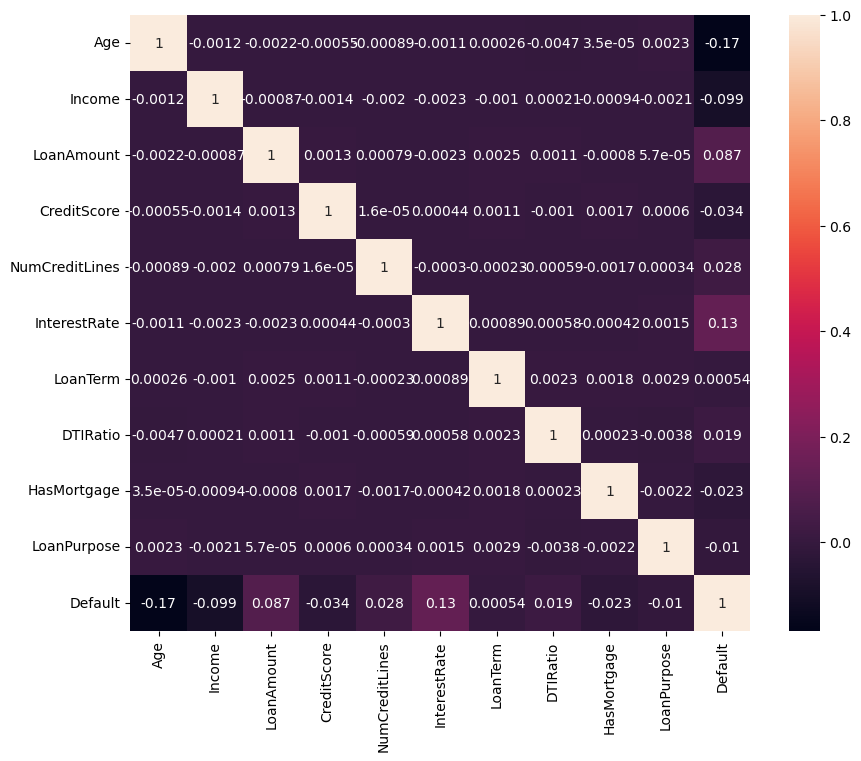

In [43]:
# visualize correlation matrix of numerical variables
correlation_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True)
plt.show()

In [44]:
# Import RandomForestClassifier algorithm
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=80)

In [46]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=80)

In [47]:
#Testing prediction of test data
test_pred3 = rf_classifier.predict(x_test)

In [48]:
#Training prediction of train data
train_pred3 = rf_classifier.predict(x_train)

In [49]:
#test accuracy of RandomForestClassifier
accuracy_score(y_test, test_pred3)

0.8386724104170746

In [50]:
#train accuracy of RandomforestClassifier
accuracy_score(y_train, train_pred3)

0.999889206496931

In [51]:
# classificaton report of the random forest classifier
print(classification_report(y_test, test_pred3))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     45178
           1       0.26      0.21      0.23      5892

    accuracy                           0.84     51070
   macro avg       0.58      0.57      0.57     51070
weighted avg       0.83      0.84      0.83     51070



In [52]:
# confusion matrix of random forest classifier
confusion_matrix(y_test,test_pred3)

array([[41571,  3607],
       [ 4632,  1260]], dtype=int64)

In [53]:
#Import KNeighboursClassifier algorithm
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn_classifier=KNeighborsClassifier(n_neighbors=5)

In [55]:
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [56]:
#Testing prediction of test data
test_pred4=knn_classifier.predict(x_test)

In [57]:
#training prediction of data 
train_pred4=knn_classifier.predict(x_train)

In [58]:
#test accuracy of KNeighboursClassifier
accuracy_score(y_test, test_pred4)

0.624906990405326

In [59]:
#train acccuracy of  KNeighboursClassifier 
accuracy_score(y_train, train_pred4)

0.8424488687983337

In [60]:
# classificaton report of the kneighbours classifier
print(classification_report(y_test, test_pred4))

              precision    recall  f1-score   support

           0       0.89      0.65      0.75     45178
           1       0.13      0.41      0.20      5892

    accuracy                           0.62     51070
   macro avg       0.51      0.53      0.48     51070
weighted avg       0.81      0.62      0.69     51070



In [61]:
# confusion matrix of kneighbours classifier
confusion_matrix(y_test,test_pred4)

array([[29493, 15685],
       [ 3471,  2421]], dtype=int64)

In [62]:
#I have used below algorithm on this dataset


#1.logisticRegression                   Training Accuracy: 0.6577284008065767        Testing Accuracy: 0.6598002741335421
              
#2.Random ForestClassifierAlgorithm     Training Accuracy: 0.999889206496931         Testing Accuracy: 0.8386724104170746
                
#3.KNeighboursClassifier                Training Accuracy: 0.8424488687983337        Testing Accuracy: 0.624906990405326


In [63]:
# Random forest has the hieghest accuracy and kneighbors and logisticregression has least accuracy.
#So random forest classifier model is suitable for this data. 